In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

figsize = (10, 5)

In [87]:
tickers = ['VTI', 'VGK', 'VPL', 'VWO', '2510.T', '2511.T', '2519.T', 'GLDM', 'IYR', 'IFGL']
df = yf.download(tickers)['Close']

[*********************100%***********************]  10 of 10 completed


In [88]:
df.rename(columns={'2510.T': 'NF_JP_bonds', '2511.T': 'NF_World_bonds', '2519.T': 'NF_EMG_bonds'}, inplace=True)

In [89]:
df['lr_vti'] = np.log(df['VTI'] / df['VTI'].shift(1))
df['lr_vgk'] = np.log(df['VGK'] / df['VGK'].shift(1))
df['lr_vpl'] = np.log(df['VPL'] / df['VPL'].shift(1))
df['lr_vwo'] = np.log(df['VWO'] / df['VWO'].shift(1))
df['lr_nf_jp_bonds'] = np.log(df['NF_JP_bonds'] / df['NF_JP_bonds'].shift(1))
df['lr_nf_world_bonds'] = np.log(df['NF_World_bonds'] / df['NF_World_bonds'].shift(1))
df['lr_nf_emg_bonds'] = np.log(df['NF_EMG_bonds'] / df['NF_EMG_bonds'].shift(1))
df['lr_gldm'] = np.log(df['GLDM'] / df['GLDM'].shift(1))
df['lr_iyr'] = np.log(df['IYR'] / df['IYR'].shift(1))
df['lr_ifgl'] = np.log(df['IFGL'] / df['IFGL'].shift(1))

<Axes: xlabel='Date'>

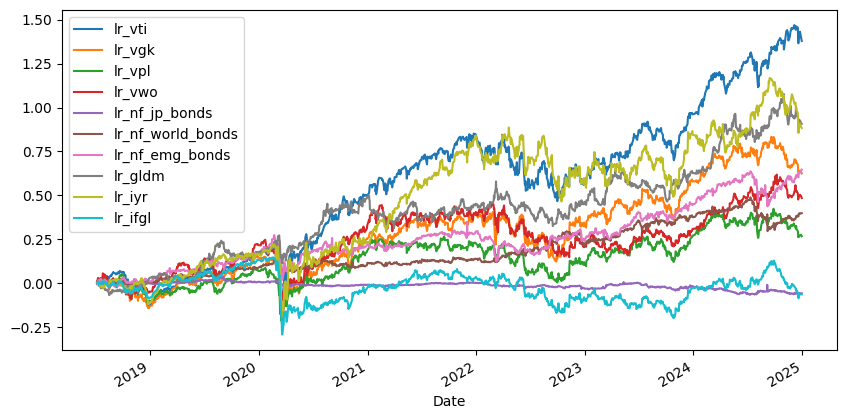

In [90]:
df_adj = df.dropna()

def cum_r(df, col):
    cum_lr = df[col].cumsum()
    return np.exp(cum_lr) - 1

cols = ['lr_vti', 'lr_vgk', 'lr_vpl', 'lr_vwo', 'lr_nf_jp_bonds', 'lr_nf_world_bonds', 'lr_nf_emg_bonds', 'lr_gldm', 'lr_iyr', 'lr_ifgl']
df_cum = pd.DataFrame()
for col in cols:
    df_cum[col] = cum_r(df_adj, col)

fig, ax = plt.subplots(figsize=figsize)
df_cum.plot(ax=ax)

In [91]:
def get_sd(df, col):
    return df[col].std()

for col in cols:
    print(f'{col} sd: {get_sd(df_adj, col):.3%}')


lr_vti sd: 1.290%
lr_vgk sd: 1.293%
lr_vpl sd: 1.155%
lr_vwo sd: 1.300%
lr_nf_jp_bonds sd: 0.283%
lr_nf_world_bonds sd: 0.564%
lr_nf_emg_bonds sd: 0.810%
lr_gldm sd: 0.900%
lr_iyr sd: 1.484%
lr_ifgl sd: 1.165%


In [92]:
def get_weight(df, cols):
    inv_sd_dict = {}
    for col in cols:
        inv_sd = 1 / get_sd(df, col)
        inv_sd_dict[col] = inv_sd
    sum_inv_sd = sum(inv_sd_dict.values())
    weight_dict = {col: inv_sd / sum_inv_sd for col, inv_sd in inv_sd_dict.items()}
    return weight_dict

weights = get_weight(df_adj, cols)

for col, weight in weights.items():
    print(f'{col} weight: {weight:.3%}')

lr_vti weight: 6.267%
lr_vgk weight: 6.255%
lr_vpl weight: 7.004%
lr_vwo weight: 6.219%
lr_nf_jp_bonds weight: 28.555%
lr_nf_world_bonds weight: 14.342%
lr_nf_emg_bonds weight: 9.985%
lr_gldm weight: 8.982%
lr_iyr weight: 5.451%
lr_ifgl weight: 6.941%


In [93]:
total_asset = 130
for col in cols:
    asset_dict = {}
    asset_dict = {col: total_asset * weight for col, weight in weights.items()}

print(f'Total asset: {total_asset} 万円')
for col, asset in asset_dict.items():
    print(f'{col} asset: {asset:.3f} 万円')

Total asset: 130 万円
lr_vti asset: 8.147 万円
lr_vgk asset: 8.131 万円
lr_vpl asset: 9.105 万円
lr_vwo asset: 8.085 万円
lr_nf_jp_bonds asset: 37.121 万円
lr_nf_world_bonds asset: 18.645 万円
lr_nf_emg_bonds asset: 12.980 万円
lr_gldm asset: 11.677 万円
lr_iyr asset: 7.086 万円
lr_ifgl asset: 9.024 万円
